In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akhilp

In [4]:

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome"]

df = pd.read_csv("kddcup99.csv", header=None, names = col_names)

In [5]:
#fill in NAN values 
#fill forward, fills in NaN values with the last corressponding value before 
#NaN Value has been reached

df = df.fillna(method='ffill')

df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
#cleaning up data and dropping NaN and Infinity Values
df = df.dropna()
assert pd.isnull(df).sum().sum() == 0 
assert pd.isna(df).sum().sum() == 0

#Replace NaN and infinity values 
#df['Flow Bytes/s'] = df['Flow Bytes/s'].replace(np.nan, 0)
df.replace(np.nan, 0, inplace=True)

In [7]:
#split into features and outcomes

x = df.drop(['outcome'], axis = 1 )
y = df[['outcome']]

In [8]:
x[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [9]:
dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

In [10]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column
x = merged.drop(['icmp','protocol_type'], axis = 1)


x[0:5]


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp,udp
0,0,http,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1,0
1,0,http,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1,0
2,0,http,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1,0
3,0,http,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1,0
4,0,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1,0


In [11]:
merged_1 = pandas.concat([x, dummies_2], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_1.drop(['whois','service'], axis = 1)

x[0:5]

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet
0,0,SF,181,5450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,SF,239,486,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,SF,235,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,SF,219,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,SF,217,2032,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
merged_2 = pandas.concat([x, dummies_3], axis = 'columns')

x = merged_2.drop(['SH','flag'], axis = 1)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#turn malicious packets into true and normal into false

y['Target'] = y['outcome'] != 'normal.'
y = y.drop('outcome', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [15]:
###scale data between 0 and 1 
## with 1 = standard deviation and mean = 0 

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.033283,-0.003424,0.105603,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
1,-0.033283,-0.003377,-0.017420,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
2,-0.033283,-0.003380,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
3,-0.033283,-0.003393,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
4,-0.033283,-0.003394,0.020894,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913


In [16]:
np.mean(x), np.std(x)

(duration          6.871244e-14
 src_bytes        -1.208943e-15
 dst_bytes         8.828371e-14
 land              1.873642e-14
 wrong_fragment   -5.971638e-14
                       ...     
 S0                4.632950e-13
 S1               -3.972015e-14
 S2                1.891382e-14
 S3                1.342444e-14
 SF               -6.843215e-13
 Length: 115, dtype: float64, duration          1.0
 src_bytes         1.0
 dst_bytes         1.0
 land              1.0
 wrong_fragment    1.0
                  ... 
 S0                1.0
 S1                1.0
 S2                1.0
 S3                1.0
 SF                1.0
 Length: 115, dtype: float64)

In [17]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 115 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (316590, 115)
Transformed Shape: (316590, 2)
[[ 1.1446324   2.85729831]
 [ 1.13924674  2.84082905]
 [ 1.11484069  2.81576043]
 ...
 [-2.05211991 -0.81019493]
 [-2.05211991 -0.81019493]
 [-2.05211991 -0.81019493]]


In [18]:
#Split into test and training sets. 30% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(269101, 2)
(47489, 2)
(269101, 2)
(47489, 2)


In [23]:
# Create Neural Network, with 4 hidden layers and 2 output layers being subjected to the softmax probability function
# and 2 input layers which was reduced by PCA

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1), bias_initializer = initializers.Constant(0.2)))
model.add(Dropout(0.2))
model.add(Dense(180, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), )) 
model.add(Dropout(0.2))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

optimizer = Adam(lr=1e-4, beta_1=0.99, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=3, verbose=3, mode='auto', restore_best_weights=True, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 269101 samples, validate on 47489 samples
Epoch 1/100
269101/269101 [==============================] - 18s 67us/step - loss: 0.1171 - acc: 0.9710 - val_loss: 0.0608 - val_acc: 0.9852
Epoch 2/100
269101/269101 [==============================] - 18s 66us/step - loss: 0.0641 - acc: 0.9824 - val_loss: 0.0540 - val_acc: 0.9857
Epoch 3/100
269101/269101 [==============================] - 18s 65us/step - loss: 0.0561 - acc: 0.9844 - val_loss: 0.0463 - val_acc: 0.9875
Epoch 4/100
269101/269101 [==============================] - 18s 66us/step - loss: 0.0510 - acc: 0.9857 - val_loss: 0.0432 - val_acc: 0.9879
Epoch 5/100
269101/269101 [==============================] - 18s 66us/step - loss: 0.0483 - acc: 0.9865 - val_loss: 0.0410 - val_acc: 0.9881
Epoch 6/100
269101/269101 [==============================] - 18s 66us/step - loss: 0.0465 - acc: 0.9868 - val_loss: 0.0393 - val_acc: 0.9884
Epoch 7/100
269101/269101 [==============================] - 18s 66us/step - loss: 0.0450 - acc: 0.9872

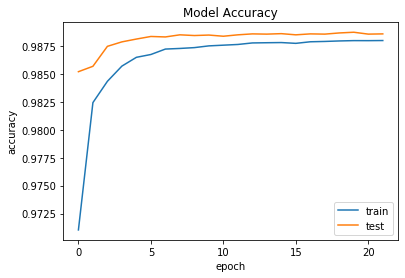

In [26]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

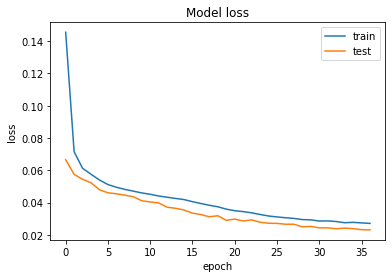

In [26]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [25]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, predictors)

In [27]:
cm

array([[21224,    33],
       [ 1078, 72642]])

In [28]:

#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 21224
FP = 33
FN = 1078
TN = 72642

In [29]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy:  ", Acc * 100, '%')

Accuracy:   98.83024311149015 %


In [30]:
# Precision

PPV = ((TP)/(TP+FP))

print("Precision", PPV * 100, '%')

Precision 99.84475702121655 %


In [31]:
# Recall 

TPR = ((TP)/(TP + FN))

print("Recall: ", TPR * 100, '%')

Recall:  95.16635279347145 %


In [32]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [33]:
#weights associated with each connect neuron 

weights

array([[-3.8136357e-01,  1.5144601e-01,  3.5209611e-01,  5.7921553e-01,
        -1.8213345e+00, -9.7480273e-01,  1.4589709e+00,  2.0464340e-01,
         1.5061026e+00, -2.0075259e+00, -1.4117491e+00, -2.1749463e+00,
         9.9897707e-01, -7.1329874e-01, -1.7746228e-01, -6.8815136e-01,
        -1.5401994e+00,  2.5974575e-01, -3.2644030e-01, -2.6120836e-01,
         5.3695834e-01,  1.8793508e+00,  1.3713746e-01,  1.7922668e-02,
         2.0285397e+00,  1.6588285e+00, -2.4881387e+00, -2.8296237e+00,
        -9.8234773e-01,  1.8353404e+00, -6.5066737e-01,  1.0161279e+00,
         5.4809332e-01,  1.2713693e+00,  1.9275671e+00,  2.2443459e+00,
         4.0523127e-01, -8.2450491e-01, -2.1218996e+00,  1.1303184e+00,
        -1.8576510e+00,  2.2964101e+00, -9.0401387e-01, -9.2341548e-01,
         3.5701957e-01,  5.4980334e-02,  1.0125887e+00,  1.5499771e+00,
         2.0909760e+00, -2.4357994e-01, -5.6427342e-01, -1.0066235e+00,
         1.1174562e-01, -1.1978499e-01,  2.7271556e-02,  7.58042

In [34]:
#bias for each connected neuron

biases

array([ 1.64521486e-01,  6.89740598e-01, -4.68273312e-01,  5.36368899e-02,
       -3.17355514e-01,  8.33450910e-03,  2.12210000e-01, -2.39208996e-01,
       -4.84738499e-01, -2.43008822e-01,  8.24581534e-02, -5.18923044e-01,
        1.18871617e+00, -2.87316680e-01,  6.42634705e-02,  2.49502480e-01,
        8.09580088e-02, -4.64191258e-01,  1.71766296e-01, -1.98264420e-01,
        2.83187717e-01,  1.97513849e-02,  3.15227181e-01,  3.21645260e-01,
        3.22315007e-01, -2.28784382e-02, -2.15244725e-01, -4.69717801e-01,
        1.51122555e-01, -3.11654270e-01,  6.57155275e-01,  5.74224740e-02,
       -3.45456749e-01,  2.63629615e-01, -2.01904729e-01,  5.45528494e-02,
       -1.17723025e-01,  1.14948913e-01, -3.98757994e-01, -3.71731997e-01,
       -1.99570403e-01,  5.57716452e-02,  5.09670019e-01,  1.05046466e-01,
        5.98510027e-01,  3.56230497e-01, -4.45012957e-01, -3.11090171e-01,
        2.89874524e-01,  7.79805660e-01,  1.66015014e-01,  4.91840169e-02,
        3.47386807e-01,  